# Emax vs sfr_n

In [24]:
# imports
from importlib import reload
import numpy as np

from matplotlib import pyplot as plt

from zdm.craco import loading

from zdm import iteration as it
from zdm import io

import figs_zdm_H0_I

# Load

In [126]:
cube_out = np.load('../Analysis/Cubes/craco_sfr_Emax_cube.npz')
#cube_out = np.load('../Analysis/Cubes/craco_submini_cube.npz')  # Only for a bit of testing

In [127]:
ll = cube_out['ll']

# Fuss a bit

In [128]:
ll[np.isnan(ll)] = -1e99

In [129]:
ll.max()

-568.11

In [130]:
lEmax = cube_out['lEmax']
sfr = cube_out['sfr_n']
#
dE = lEmax[1]-lEmax[0]
dsfr = sfr[1] - sfr[0]

In [131]:
ll -= ll.max()

In [132]:
lEmax.min(), lEmax.max()

(40.5, 42.5)

In [133]:
sfr.min(), sfr.max()

(0.0, 4.0)

# Plot

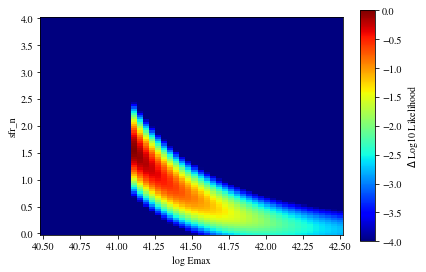

In [134]:
plt.clf()
ax = plt.gca()

im=plt.imshow(ll.T,cmap='jet',origin='lower', 
                  interpolation='None', extent=[lEmax.min()-dE/2, lEmax.max()+dE/2, sfr.min()-dsfr/2, sfr.max()+dsfr/2],
              aspect='auto', vmin=-4.
             )#aspect=aspect)
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
cbar.set_label(r'$\Delta$ Log10 Likelihood')
#
ax.set_xlabel('log Emax')
ax.set_ylabel('sfr_n')
plt.savefig('fig_sfr_vs_Emax.png', dpi=200)
plt.show()

## Max

In [81]:
imax = np.argmax(ll[np.isfinite(ll)])
imax

1539

In [83]:
i,j = np.unravel_index(imax, ll.shape)
i,j

(15, 39)

In [84]:
sfr[j], lEmax[i]

(1.575757575757576, 41.11224489795919)

----

# Let's look at some DM-z plots

## Load up

In [95]:
############## Load up ##############
input_dict=io.process_jfile('../Analysis/Cubes/craco_sfr_Emax_cube.json')

# Deconstruct the input_dict
state_dict, cube_dict, vparam_dict = it.parse_input_dict(input_dict)

############## Initialise ##############
# ONLY FOR CRACO SO FAR
survey, grid = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100,
    iFRB=100)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid


## Fiducial first

Host: mean=278.77755364720525, median=151.3561248436209


/data/Projects/FRB_Software/zdm/zdm/figures.py:65: RuntimeWarning: divide by zero encountered in log10
  proc_grid = np.log10(proc_grid)


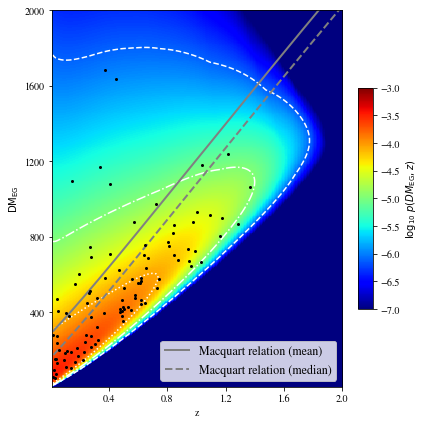

Wrote: fig_craco_fiducial.png


In [92]:
reload(figs_zdm_H0_I)
figs_zdm_H0_I.fig_craco_fiducial(grid=grid, survey=survey, show=True, figsize=(6,6))

## Ramp me up!

In [96]:
############## Initialise ##############
# ONLY FOR CRACO SO FAR
survey2, grid2 = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100,
    iFRB=100)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid


In [97]:
vparams = dict(lEmax=41.11, sfr_n=1.576)
grid2.update(vparams)

/data/Projects/FRB_Software/zdm/zdm/figures.py:65: RuntimeWarning: divide by zero encountered in log10
  proc_grid = np.log10(proc_grid)


Host: mean=278.77755364720525, median=151.3561248436209


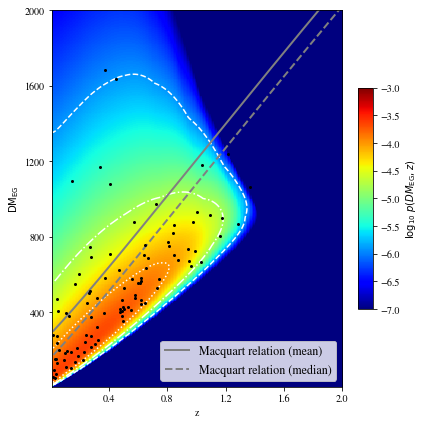

Wrote: fig_craco_fiducial.png


In [98]:
reload(figs_zdm_H0_I)
figs_zdm_H0_I.fig_craco_fiducial(grid=grid2, survey=survey2, show=True, figsize=(6,6))

### Only increase sfr_n

In [114]:
############## Initialise ##############
# ONLY FOR CRACO SO FAR
survey3, grid3 = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100,
    iFRB=100)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid


In [115]:
vparams3 = dict(sfr_n=1.576)
grid3.update(vparams3)

/data/Projects/FRB_Software/zdm/zdm/figures.py:65: RuntimeWarning: divide by zero encountered in log10
  proc_grid = np.log10(proc_grid)


Host: mean=278.77755364720525, median=151.3561248436209


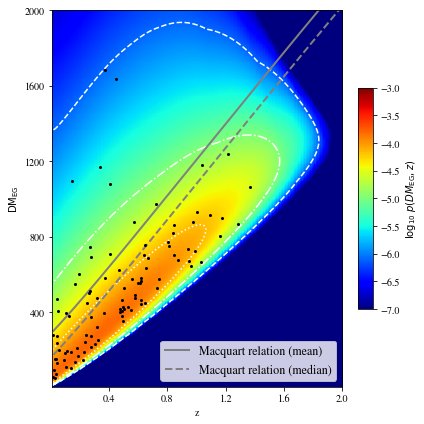

Wrote: fig_craco_fiducial.png


In [116]:
figs_zdm_H0_I.fig_craco_fiducial(grid=grid3, survey=survey3, show=True, figsize=(6,6))

----

# Likelihood

In [108]:
reload(it)

<module 'zdm.iteration' from '/data/Projects/FRB_Software/zdm/zdm/iteration.py'>

## Fiducial

In [112]:
C,llC,lltot=it.minimise_const_only(
    None,[grid],[survey])
grid.state.FRBdemo.lC = C
lls_final, nterm, pvterm, lpvals, lwz = it.calc_likelihoods_2D(
                    grid, survey, 
                    norm=True,psnr=True,dolist=4, verbose=True)
print(f'lls_final={lls_final}')

Pll term = -2.248582174587989
rates=0.00295,nterm=253.08,pvterm=-670.20,wzterm=-149.48,comb=-819.67
lls_final=-568.8437724499803


/home/xavier/Projects/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


## Other

In [113]:
C2,llC,lltot=it.minimise_const_only(
    None, [grid2], [survey2])
grid2.state.FRBdemo.lC = C2
lls_final, nterm, pvterm, lpvals, lwz = it.calc_likelihoods_2D(
                    grid2, survey2, 
                    norm=True,psnr=True,dolist=4, verbose=True)
print(f'lls_final={lls_final}')

Pll term = -2.248582174589569
rates=0.00475,nterm=232.33,pvterm=-653.29,wzterm=-144.90,comb=-798.19
lls_final=-568.1080266828025
